# Исследование заведений общественного питания г. Москвы

- Автор: Тюлюпов Глеб
- Дата:21.04.2025

### Цели и задачи проекта

**Цель:** Проведение исследовательского анализа заведений общественного питания г. Москвы, на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года.   

**Задачи:**
1. Загрузка данных и знакомство с их содержимым.
2. Проведение предобработки данных.
3. Исследовательский анализ данных, в том числе:
    - анализ категорий заведений общественного питания;
    - анализ административных районов Москвы в разрезе заведений общественного питания;
    - изучение соотношения сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;
    - исследование количества посадочных мест в заведениях;
    - анализ рейтинга заведений;
    - анализ корреляции рейтинга заведений с другими заведениями;
    - изучение популярных сетей заведений;
    - изучение вариации среднего чека в зависимости от района Москвы.
    
    
4. Формулирование выводов и рекомендаций по проведённому анализу.


### Содержимое проекта

 Проект включает в себя следующие основные этапы:
   1. Загрузка данных и знакомство с ними.
   2. Предобработка данных.
   3. Исследовательский анализ данных.
   4. Формирование итоговых выводов и рекомендаций.


## 1. Загрузка данных и знакомство с ними

Начнём с загрузки необходимых библиотек, а также с датасетов с данными о заведениях общественного питания Москвы - `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных `matplotlib` и `seaborn`, а также `phik` для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
# Импортируем библиотеку pandas
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

#Устанавливаем библиотеку phik
!pip install phik

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

     |████████████████████████████████| 677 kB 2.2 MB/s eta 0:00:01


In [2]:
# Выгружаем данные датасетов в переменные info_df и price_df
info_df=pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df=pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Далее познакомимся с данными и изучим общую информацию о них. Для этого выгрузим первые пять строк датасета `datasets/rest_info.csv` методом `head()`. Также изучим общую информацию о датафрейме с помощью метода `info()`.

In [3]:
# Выгружаем первые пять строк датафрейма info_df
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выгрузим общую информацию о датафрейме
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания г. Москвы.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к оптимальному формату.
- Шесть столбцов,в том числе столбцы `id`,`name`,`category`,`address`,`district` и `hours` содержат информацию в формате `object`. Для столбцов `name`,`category`,`address`,`district` данный формат является оптимальным. Столбцы`id` и `hours` содрежат информацию по типу `"0c3e3439a8c64ea5bf6ecd6ca6ae19f0"` и `"ежедневно, 10:00–22:00"` соответственно, следовательно, формат `object` также является для них оптимальным.
- Информация в столбцах `rating` и `seats` хранится в формате float64. Столбец `rating` содержит информацию о рейтинге заведений, максимальная оценка - 5.0, в связи с чем, предварительно проверив данные в столбце на ошибки и аномалии можно понизить разрядность  данных до float32. Информацию в столбце `seats` можно привести к формату integer с оптимальной размерностью с помощью метода `to_numeric()`.  
- Информация в столбце `chain` содержится в формате int64. Данный столбец содержит число, выраженное 0 или 1, которое показывает, является ли заведение сетевым. С помощью метода `to_numeric()` можно понизить размерность данных до оптимальных значений.
- Пропуски содержатся в столбцах `hours` и `seats`, содержащие информацию о часах работы заведений и посадочных местах соответственно. Данные пропуски могут объясняться особенностью категории заведений или отсутствием соответствующей информации. Вместе с тем следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Далее познакомимся с данными датасета `/datasets/rest_price.csv` с помощью методов `head()` и `info()`.

In [5]:
# Выгружаем первые пять строк датафрейма info_price
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выгружаем общую информацию о датафрейме info_price
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `datasets/rest_info.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания г. Москва.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к оптимальному формату snake_case.
- Три столбца, в том числе `id`,`price` и `avg_bill`, содержат информацию в формате `object`, что для данных столбцов является оптимальным.
- Информация в столбцах `middle_avg_bill` и `middle_coffee_cup` хранится в формате float64. С помощью метода `to_numeric()` можно оптимизировать разрядность в данных столбцах и привести данные к формату integer.
- Пропуски содержатся в столбцах `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`. Количество пропусков в столбцах `price`, `avg_bill`, `middle_avg_bill` колеблется от 5 до 20%, в то время как в столбце `middle_coffee_cup` данный показатель составляет 87%. Данные пропуски могут объясняться особенностью категории заведений или отсутствием соответствующей информации. Пропуски в столбцах  `middle_avg_bill` и `middle_coffee_cup` связаны с пропусками в столбце `avg_bill`, поскольку значения в  столбцах `middle_avg_bill` и `middle_coffee_cup` отражают значения в столбце `avg_bill`.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию. 

### Промежуточный вывод

Первичное знакомство показывает, что названия столбцов уже приведены к оптимальному формату и соответствуют описанию. В большинстве случаев используются верные типы данных, однако для части числовых данных можно оптимизировать разрядность, а также заменить в некоторых столбцах формат с float на integer.
Пропуски содержатся в столбцах hours, seats, price, avg_bill, middle_avg_bill и middle_coffee_cup. Данные пропуски могут быть связаны с особенностями категории заведения или отсутствием соответствующей информации, при этом пропуски в столбцах middle_avg_bill и middle_coffee_cup связаны с пропусками в столбце avg_bill.

### Подготовка единого датафрейма

Далее соединим данные двух датасетов в один с помощью метода `merge()` для поиска закономерностей в данных. Соединять данные будем по идентификатору заведения - `id`. Для дальнейшего анализа необходимо полностью сохранить полную информацию о заведениях, в связи с чем присоединение датафрейма price_df к датафрейму info_df будет осуществляться с помощью  параметра `how='left'`. Новому датафрейму присвоим название `df_rest`.

In [7]:
# Соединим данный в единый датафрейм:
rest_df = info_df.merge(price_df, on='id', how='left')

In [8]:
# Выводим информацию о полученном датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Полученный датафрейм содержит 13 столбцов и 8406 строк. Пропуски из двух исходных датафреймов сохранились в том же количестве.

Перейдём к следующему этапу - предобработке данных.

## 2. Предобработка данных

На данном этапе предполагается подготовка данных к исследовательскому анализу.

### 2.1 Оптимизируем типы данных

Изучим корректность типов данных и при необходимости проведём их преобразование.

Столбцы `id`, `name`, `category`, `address`, `district`, `hours`, `price` и `avg_bill` содержат данные в формате `object`, что является для них оптимальным.

Столбец `rating` содержит информацию о рейтинге заведений, максимальная оценка - 5.0, в связи с чем, предварительно проверив данные в столбце на ошибки и аномалии можно понизить разрядность  данных до float32.   

In [9]:
# Проверим минимальные и максимальные значения в столбце `rating`
print(rest_df['rating'].min())
print(rest_df['rating'].max())

1.0
5.0


In [10]:
# Оптимизируем разрядность для столбца `rating`
rest_df['rating'] = pd.to_numeric(rest_df['rating'],
                                    downcast='float')

Информацию в столбце `seats` можно привести к формату integer с оптимальной размерностью с помощью метода `to_numeric()`. Поскольку столбец содержит пропуски, необходимо предварительно заменить их на значение-индикатор или удалить. Однако в дальнейшем нам предстоит анализ количества посадочных мест в заведениях, в связи с чем замена пропусков может оказать влияние статистические показатели параметра. В связи с чем для данного столбца сохраним формат `float` с понижением разрядности.

In [11]:
# Оптимизируем разрядность для столбца `seats`
rest_df['seats'] = pd.to_numeric(rest_df['seats'],
                                    downcast='float')

Информация в столбце `chain` содержится в формате `int64`. Данный столбец содержит число, выраженное `0` или `1`, которое показывает, является ли заведение сетевым. С помощью метода `to_numeric()` понизим размерность данных до оптимальных значений.

In [12]:
# Оптимизируем целочисленный тип данных столбца 'chain'
rest_df['chain'] = pd.to_numeric(rest_df['chain'],
                                    downcast='integer')

Информация в столбцах `middle_avg_bill` и `middle_coffee_cup` хранится в формате float64. С помощью метода `to_numeric()` можно оптимизировать разрядность в данных столбцах и привести данные к формату integer. Однако как и в случае со столбцом, `seats` данные столбцы содержат пропуски, которые необходимо предварительно обработать. При этом параметр `middle_avg_bill` необходим нам при изучении вариации среднего чека заведения в зависимости от административного района, в связи с чем сохраним формат `float` для данного столбца с понижением разрядности.
Для столбца `middle_coffee_cup`, скорректируем формат данных  в следующем подразделе после обработки пропусков.

In [13]:
# Оптимизируем разрядность для столбца `middle_avg_bill`
rest_df['middle_avg_bill'] = pd.to_numeric(rest_df['middle_avg_bill'],
                                    downcast='float')

Выведем обновлённые типы данных для столбцов датафрейма rest_df с помощью атрибута dtypes.

In [14]:
#Проверим типы данных в датафрейме rest_df
rest_df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float64
dtype: object

Таким образом, для столбцов `rating`, `seats`, `middle_avg_bill` и `chain` были оптимизированы типы данных с понижением размерности. Данные для столбца `middle_coffee_cup` будут оптмизированы в следующем подразделе после обработки пропусков.

### 2.2 Изучим пропущенные значения в данных

В данном позразделе изучим пропущенные значения в данных: посчитаем их количество в каждом столбце датафрейме, изучим данные с пропущенными значениями и предположите гипотезы их появления. Также проведём обработку пропущенных значений: заменим пропуски на определённые значения, или удалим строки с пропусками или оставим их как есть.

Посчитаем количество пропусков в каждом столбце датафрейма с помощью метода `isna()`.

In [15]:
# Выведем количество пропусков каждом столбце датафрейма rest_df
rest_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

Далее посчитаем долю строк с пропусками для каждого столбца датафрейма.

In [16]:
# Подсчитываем долю строк с пропусками в датафрейме rest_df
rest_df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

Пропуски содержатся в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.

Доля пропусков в столбце `hours` составляет 6,4%. Данные пропуски могут объясняться особенностью категории заведений или отсутствием соответствующей информации. Выведем строки с пропусками в столбце `hours`.

In [17]:
# Выведем строки с пропусками в столбце 'hours'
rest_df[rest_df['hours'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
38,3746fe879e5b43629512095693ce4113,Ижора,булочная,"Москва, Ижорский проезд, 5А",Северный административный округ,NaN,4.4,0,NaN,NaN,NaN,NaN,NaN
40,e5f4ff8c7196472eac2c980fc6b2e9b2,Кафе,кафе,"Москва, Ижорская улица, 18, стр. 1",Северный административный округ,NaN,3.7,0,NaN,NaN,NaN,NaN,NaN
44,0cb57ea286804a0fbff91ae2cc868d48,Кафетерий,кафе,"Москва, Ангарская улица, 24А",Северный административный округ,NaN,3.8,1,8.0,NaN,NaN,NaN,NaN
56,2b2b60640efb494b8ed4aa3b1313f1cd,Рыба из тандыра,быстрое питание,"Москва, Коровинское шоссе, 46, стр. 5",Северный административный округ,NaN,1.5,0,NaN,NaN,NaN,NaN,NaN
108,a9ad4bd7e15c4b8cb6295c745e5a11c1,Кафе,"бар,паб","Москва, МКАД, 82-й километр, вл18",Северо-Восточный административный округ,NaN,4.2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236,4c48d06135d744a5a9d05e56d48d3818,1у,кафе,"Москва, Нагатинская набережная, 40/1к1",Южный административный округ,NaN,3.4,0,NaN,NaN,NaN,NaN,NaN
8375,f2cca1ec4a9348a686f0b9e86dba4e7b,Улица Гурьянова 55,кафе,"Москва, улица Гурьянова, 55",Юго-Восточный административный округ,NaN,4.5,0,NaN,NaN,NaN,NaN,NaN
8378,7cbd1c883e8a4b8e93ef33dfc4cc1c14,Восточно-грузинская кухня,быстрое питание,"Москва, Зеленодольская улица, 32, корп. 3",Юго-Восточный административный округ,NaN,4.3,0,120.0,NaN,NaN,NaN,NaN
8381,ba0d8f9430004985a42e2a5cd6554b9e,Аэлита,кафе,"Москва, Ферганская улица, 8, корп. 2, стр. 1",Юго-Восточный административный округ,NaN,3.8,0,30.0,NaN,NaN,NaN,NaN


Как видно из выгрузки, пропуски не выглядят связанными с другими столбцами датафрейма. Следовательно, с высокой долей вероятности связаны с отсутствием информации о часах работы соответствующих  заведений. Поскольку в столбце содержатся данные текстового типа, оптимальным вариантом будет заменить пропуски на пустую строку.

Доля пропусков в столбце `seats` составляет 43%. Поскольку в дальнейшем нам необходимо проанализировать количество посадочных мест в заведениях, замена пропусков на индикаторы может исказить данные. В связи с чем оптимальным вариантом будет оставить данные пропуски.

In [18]:
# Выведем строки с пропусками в столбце 'seats'
rest_df[rest_df['seats'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
12,9384a51a4b2749759234df689b3a4857,Заправка,кафе,"Москва, МКАД, 80-й километр, 1",Северный административный округ,вт-сб 09:00–18:00,4.3,0,NaN,средние,Средний счёт:330 ₽,330.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8387,962800540173458486f3c465437c2d8b,Pab&burg,"бар,паб","Москва, улица Михайлова, 22, корп. 4",Юго-Восточный административный округ,"ежедневно, 12:00–21:30",4.2,0,NaN,средние,Цена бокала пива:от 140 ₽,NaN,NaN
8389,3e5d9167d59248a69e6f3d6a0749d38c,Assa,ресторан,"Москва, улица Авиаконструктора Миля, 3А",Юго-Восточный административный округ,"пн-чт 09:00–22:00; пт,сб 09:00–23:00; вс 09:00...",4.9,0,NaN,NaN,NaN,NaN,NaN
8392,c55cb77b463b489491e703b8a94f286a,Касабланка,кафе,"Москва, Большая Косинская улица, 27",Восточный административный округ,пн-чт 08:00–17:00; пт 08:00–16:00,3.3,0,NaN,NaN,NaN,NaN,NaN
8394,03c53ed5236948179947b46b7338d18d,Намангале,кафе,"Москва, Ферганская улица, вл17-21",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.3,0,NaN,NaN,NaN,NaN,NaN


Выгрузка показала, что пропуски в столбце seats также с высокой долей вероятности не связаны с другими столбцами, в связи с чем, данные пропуски могут быть связаны с отсутствием информации о посадочных местах соответствующих заведений.

Доля пропусков в столбце `price` составляет 60,6%. 

In [19]:
# Выведем строки с пропусками в столбце 'price'
rest_df[rest_df['price'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


Стобцы с пропусками в столбце `price` также не выглядят связанными с другими столбцами, что говорит о том, что пропуски связаны с отсутствием информации о ценах соответствующих заведений. Как и в случае со столбцом `seats` в данном столбце содержатся данные текстового типа, оптимальным вариантом будет заменить пропуски на пустую строку.

Доля пропусков в столбце `avg_bill` составляет 54,6%. Выведем строки с пропусками в данном столбце. 

In [20]:
# Выведем строки с пропусками в столбце 'avg_bill'
rest_df[rest_df['avg_bill'].isna()]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
5,8a343546b24e4a499ad96eb7d0797a8a,Sergio Pizza,пиццерия,"Москва, Ижорская улица, вл8Б",Северный административный округ,"ежедневно, 10:00–23:00",4.6,0,NaN,средние,NaN,NaN,NaN
11,53ac103717c142f29907080db1f0ce58,Шашлык Шефф,кафе,"Москва, улица Маршала Федоренко, 10с1",Северный административный округ,"ежедневно, 10:00–21:00",4.9,0,NaN,NaN,NaN,NaN,NaN
13,aea18265b0a0415893f1e796b82568fe,Буханка,булочная,"Москва, Базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",4.8,1,180.0,NaN,NaN,NaN,NaN
19,feec6bedccae44cb877d99c13f9aa5d7,Пекарня,булочная,"Москва, Ижорский проезд, 5",Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,7f54f18753414d97abdddea3a2a48511,Практика Кофе,кофейня,"Москва, Чонгарский бульвар, 26А, корп. 1",Юго-Западный административный округ,"пн-пт 08:00–22:00; сб,вс 09:00–22:00",4.4,0,55.0,NaN,NaN,NaN,NaN
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


Выгрузка также не показала взаимосвязь пропусков с другими столбцами. Для данного столбца заменим пропуски на пустую строку.

Пропуски в столбцах `middle_avg_bill` и `middle_coffee_cup` связаны с пропусками в столбце `avg_bill`, поскольку значения в столбцах `middle_avg_bill` и `middle_coffee_cup` отражают значения из столбца `avg_bill`.

Далее проверим столбцы без пропусков на наличие значений-индикаторов. Для этого выведем количество уникальных значений для столбцов `id`, `name`, и `address`. 

In [21]:
# Выведем количество уникадбных значений для столбцов 'id', 'name', 'address'
for column in ['id', 'name', 'address']:
    print(f'Уникальные значения в столбце {column}:')
    print(rest_df[column].sort_values().nunique())
    print()

Уникальные значения в столбце id:
8406

Уникальные значения в столбце name:
5614

Уникальные значения в столбце address:
5753



Количество уникальных значений в столбце `id` соответствует количеству строк датафрейма, что свидетельствует об отсутствии значений-индикаторов.

Количество уникальных значений в столбцах `name` и `address` не соответствуют количеству уникальных строк в датафрейме, что может свидетельствовать о значениях-индикаторах. Чтобы это проверить дополнительно выведем группировку строк по данным столбцам с помощью метода `value_counts`.

In [22]:
# Выведем уникальные значения для столбца name
rest_df['name'].value_counts()

Кафе                    189
Шоколадница             120
Домино'с Пицца           76
Додо Пицца               74
One Price Coffee         71
                       ... 
Шантимэль                 1
Food Way                  1
МореМоре                  1
Lori Bar                  1
Меркурий СтройСервис      1
Name: name, Length: 5614, dtype: int64

In [23]:
# Выведем уникальные значения для столбца address
rest_df['address'].value_counts()

Москва, проспект Вернадского, 86В               28
Москва, Усачёва улица, 26                       26
Москва, Ярцевская улица, 19                     20
Москва, площадь Киевского Вокзала, 2            20
Москва, проспект Мира, 211к2                    16
                                                ..
Москва, Люблинская улица, 10с4                   1
Москва, улица Архитектора Щусева, 2, корп. 1     1
Москва, улица Паустовского, 6, корп. 1           1
Москва, Ленинградский проспект, 80, корп. 46     1
Москва, улица Перерва, 32                        1
Name: address, Length: 5753, dtype: int64

Как видно из выгрузки, значения-индикаторы отсутствуют. Повторяющиеся значения в столбце `name` могут быть связаны с тем, что заведение является сетевым, в столбце `address` с тем, что заведения располагаются по одному адресу, например, в фуд-кортах или торговых центрах.

Далее проверим уникальные значения для столбцов `category`, `district`, `chain`. Для этого с помощью метода sort_values() выведем уникальные значения по данным столбцам.

In [24]:
# Проверяем уникальные значения в столбцах 'category', 'district', 'chain'
for column in ['category', 'district', 'chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(rest_df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце chain:
[0 1]



Все значения выглядят корректными, значений-индикаторов не выявлено.

Далее заменим пропуски в столбце `middle_coffee_cup` на значение-индикатор -1. Данный индикатор является оптимальным т.к.  средняя цена одной чашки капучино не может быть отрицательной.

Также вместе с этим приведём значения для данного столбца к формату `integer` с оптимальной разрядностью.

In [25]:
#Заменим пропуски на -1, скорректируем формат на 'integer'
for column in ['middle_coffee_cup']:
    rest_df[column]=rest_df[column].fillna(-1)
    rest_df[column] = pd.to_numeric(rest_df[column], downcast='integer')

Далее заменим пропуски в столбцах `hours`, `price`, `avg_bill`. Поскольку данные столбца содержат данные типа `object`, оптимально будет заменить пустые значения на пустые строки.

In [26]:
#Заменим пропуски на пустую строку
for column in ['price','hours', 'avg_bill']:
    rest_df[column]=rest_df[column].fillna("")

После всех преобразований снова выведем количество пропусков в датафрейме, а также общую информацию для проверки формата данных для каждого столбца. 

In [27]:
# Выводим количество пропусков в датафрейме
rest_df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                   0
avg_bill                0
middle_avg_bill      5257
middle_coffee_cup       0
dtype: int64

In [28]:
# Выводим общую информацию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float32
 9   price              8406 non-null   object 
 10  avg_bill           8406 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  8406 non-null   int16  
dtypes: float32(3), int16(1), int8(1), object(8)
memory usage: 714.2+ KB


Как видно из выгрузки пропуски в стобцах `hours`, `price`, `avg_bill` и `middle_coffee_cup` были заменены на значения-индикаторы. Также для столбца `middle_coffee_cup` данные были приведены к формату `integer` с оптимальной разрядностью. Пропуски в столбцах `seats` и `middle_avg_bill` были сохранены, чтобы не исказить данные при последующем исследовательском анализе данных.

### 2.3 Выявление явных и неявных дубликатов в данных

В данном подразделе проверим данные на явные и неявные дубликаты, в том числе поля с названием и адресом заведения.

На начальном этапе для оптимизации проверки нормализуем данные в текстовых столбцах, в том числе в столбцах name, address, hours, price, avg_bill. Для этого приведём значения в строках к нижнему регистру с помощью метода str.lower(). Также в данных столбцах удалим лишние пробелы с помощью метода str.strip().

In [29]:
# Удалим лишние пробелы в текстовых столбцах
for column in ['name', 'address', 'hours', 'price', 'avg_bill']:
    rest_df[column]=rest_df[column].str.upper()
    rest_df[column]=rest_df[column].str.strip()

Проверим изменения после проведённых преобразований.

In [30]:
#Выведем первые строки после проведённых преобразований
rest_df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",5.0,0,NaN,,,NaN,-1
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",4.5,0,4.0,ВЫШЕ СРЕДНЕГО,СРЕДНИЙ СЧЁТ:1500–1600 ₽,1550.0,-1
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",Северный административный округ,"ПН-ЧТ 11:00–02:00; ПТ,СБ 11:00–05:00; ВС 11:00...",4.6,0,45.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:ОТ 1000 ₽,1000.0,-1
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",Северный административный округ,"ЕЖЕДНЕВНО, 09:00–22:00",5.0,0,NaN,,ЦЕНА ЧАШКИ КАПУЧИНО:155–185 ₽,NaN,170
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",5.0,1,148.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:400–600 ₽,500.0,-1


Выявим явные дубликаты в датафрейме с помощью метода `duplicated()`.

In [31]:
# Проверяем полные дубликаты в датафрейме rest_df
rest_df.duplicated().sum()

0

Явных полных дубликатов не выявлено.

Проверим датафрейм на совпадение названия и адреса заведения.

In [32]:
# Выведем дубликаты по столбцам 'name' и 'address'
rest_df.loc[rest_df.duplicated(subset=['name','address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,КАФЕ,кафе,"МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ",Северный административный округ,"ЕЖЕДНЕВНО, 09:00–23:00",3.2,0,NaN,,,NaN,-1
215,897ddbc6746c4388b19dc8a9fcdbb488,КАФЕ,кафе,"МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",3.2,0,NaN,,,NaN,-1
1430,62608690e9cc464fbcd980cfd552e334,MORE POKE,ресторан,"МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2",Северный административный округ,"ЕЖЕДНЕВНО, 09:00–21:00",4.2,0,188.0,,,NaN,-1
1511,a69f018d5c064873a3b491b0121bc1b4,MORE POKE,ресторан,"МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2",Северный административный округ,"ПН-ЧТ 09:00–18:00; ПТ,СБ 09:00–21:00; ВС 09:00...",4.2,1,188.0,,,NaN,-1
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,ресторан,"МОСКВА, ПРОСПЕКТ МИРА, 118",Северо-Восточный административный округ,"ЕЖЕДНЕВНО, 12:00–00:00",4.4,0,150.0,,,NaN,-1
2420,aba1de7ad7d64ac0a3f8684bda29d905,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,"бар,паб","МОСКВА, ПРОСПЕКТ МИРА, 118",Северо-Восточный административный округ,"ПН-ЧТ 12:00–00:00; ПТ,СБ 12:00–01:00; ВС 12:00...",4.4,1,150.0,,,NaN,-1
3091,3c2a73ea79a04be48858fab3685f2f37,ХЛЕБ ДА ВЫПЕЧКА,булочная,"МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19",Западный административный округ,"ЕЖЕДНЕВНО, 09:00–22:00",4.1,1,276.0,,,NaN,-1
3109,d3116844e4e048f99614eb30be3214e0,ХЛЕБ ДА ВЫПЕЧКА,кафе,"МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19",Западный административный округ,,4.1,0,276.0,,,NaN,-1


Как видно из выгрузки, выведены 4 пары дубликатов, у которых совпадает название и адрес заведения, при этом имеются различия в категории или графике работы.

Удалим данные дубликаты с помощью метода `drop_duplicates`, сохранив первую встреченную запись для каждой пары.

In [33]:
# Удалим дубликаты по столбцам name' и 'address'
rest_df=rest_df.drop_duplicates(subset=['name','address'])

Для столбцов `category`, `district`, `chain` в предыдущем подразделе были выведены уникальные значения. Дубликатов вследствие опечаток выявлено не было.

Выведем информацию о датафрейме после удаления обнаруженных дубликатов.

In [34]:
# Выведем инфомарцию о датафрейме
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float32
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  8402 non-null   int16  
dtypes: float32(3), int16(1), int8(1), object(8)
memory usage: 713.8+ KB


Таким образом, число записей в датафрейме было сокращено с 8406 до 8402, было удалено 4 дублирующиеся записи.

### 2.4 Выведем новый столбец о круглосуточной работе заведений

Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

Вначале выведем все данные, в которых может содержаться информация о круглосуточной работе заведения с помощью метода `str.contains()`.

In [35]:
# Выведем данные, в которых может содержаться информация о круглосуточной работе
rest_24_7=rest_df[rest_df['hours'].str.contains('СУТ')]
print(rest_24_7)

                                    id                 name  category  \
10    ac32978af97641bfacf996e7f5a50ee5       GREAT ROOM BAR   бар,паб   
17    b55465d0869648a295ad1d85ed9b5c4f   ЧАЙХАНА БЕШ-БАРМАК  ресторан   
19    feec6bedccae44cb877d99c13f9aa5d7              ПЕКАРНЯ  булочная   
24    0f5d22f5377340d0a81a9328e6ebdcac           DRIVE CAFÉ      кафе   
49    a8bbd74669074068ab44bc567022ee27              2U-ТУ-Ю  пиццерия   
...                                ...                  ...       ...   
8394  03c53ed5236948179947b46b7338d18d            НАМАНГАЛЕ      кафе   
8399  71cc394927204d45b81c3a91edb47955  ПЕКАРНЯ, КАФЕ-ГРИЛЬ  булочная   
8403  62e8c64d4c89467aba608e39ef87616b              САМОВАР      кафе   
8404  06a0db5ecd4842d48cd6350aa923e297         ЧАЙХАНА SABR      кафе   
8405  9d56f8f7a7f74df1a925bc0fd2de8aae           KEBAB TIME      кафе   

                                        address  \
10               МОСКВА, ЛЕВОБЕРЕЖНАЯ УЛИЦА, 12   
17     МОСКВА, ЛЕНИНГ

Далее для полученного датафрейма выведем все уникальные значения по столбцу `hours`, где содержится информация о часах работы.

In [36]:
# Выведем уникальные значения для столбца hours датафрейма rest_24_7
rest_24_7['hours'].value_counts()

ЕЖЕДНЕВНО, КРУГЛОСУТОЧНО                                                                       730
ПН-ЧТ 08:00–23:00; ПТ 08:00–00:00; СБ КРУГЛОСУТОЧНО; ВС 00:00–23:00                              3
ПН-ЧТ 08:00–23:00; ПТ,СБ КРУГЛОСУТОЧНО; ВС 08:00–23:00                                           2
ПН-ЧТ 07:30–23:00; ПТ 07:30–00:00; СБ КРУГЛОСУТОЧНО; ВС 00:00–23:00                              2
ПН-ЧТ КРУГЛОСУТОЧНО; ПТ 00:00–05:00, ПЕРЕРЫВ 05:00–07:00; СБ 07:00–05:00; ВС 07:00–00:00         1
ПН-ЧТ 10:00–00:00; ПТ-ВС КРУГЛОСУТОЧНО                                                           1
ПН,ВТ 08:00–22:00; СР,ЧТ 08:00–23:00; ПТ,СБ КРУГЛОСУТОЧНО; ВС 00:00–22:00                        1
ПН 08:00–23:00; ВТ-ПТ 08:00–00:00; СБ КРУГЛОСУТОЧНО; ВС 00:00–23:00                              1
ПН 00:01–12:00, ПЕРЕРЫВ 12:00–13:30; ВТ-ЧТ 13:30–12:00; ПТ 13:30–00:00; СБ,ВС КРУГЛОСУТОЧНО      1
ПН-ЧТ 07:00–00:00; ПТ,СБ КРУГЛОСУТОЧНО; ВС 07:00–00:00                                           1
ПН-ЧТ 07:0

Как видно из выгрузки, заведения, работающие круглосуточно, содержат в столбце `hours` `"ЕЖЕДНЕВНО, КРУГЛОСУТОЧНО"`. Создадим функцию, которая создаст новый столбец с бинарным признаком в зависимости от значения в столбце `hours`. 

In [37]:
# Создадим функцию с бинарным признаком в зависимости от работы графика работы заведения. 
def create_is_24_7(x):
    if x=='ЕЖЕДНЕВНО, КРУГЛОСУТОЧНО':
        return True
    return False

В случае если в условии if срабатывает условие, что значение в строке равно 'ЕЖЕДНЕВНО, КРУГЛОСУТОЧНО', то функция возвращает `True`, что означает, что заведение работает круглосуточно. Если в строке содержится другое значение, то функция возвращает `False`. Применим эту функцию к столбцу `hours` и создадим новый столбец `is_24_7`.

In [38]:
# Создаём столбец is_24_7 с помощью функции create_is_24_7
rest_df['is_24_7'] = rest_df['hours'].apply(create_is_24_7)

Выведем информацию о датафрейме после создания нового столбца.

In [39]:
# Выведем информацию с помощью метода info()
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float32
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   float32
 9   price              8402 non-null   object 
 10  avg_bill           8402 non-null   object 
 11  middle_avg_bill    3149 non-null   float32
 12  middle_coffee_cup  8402 non-null   int16  
 13  is_24_7            8402 non-null   bool   
dtypes: bool(1), float32(3), int16(1), int8(1), object(8)
memory usage: 722.0+ KB


In [40]:
# Выведем первые 20 строк датафрейма
rest_df.head(20)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WOWФЛИ,кафе,"МОСКВА, УЛИЦА ДЫБЕНКО, 7/1",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",5.0,0,NaN,,,NaN,-1,False
1,045780ada3474c57a2112e505d74b633,ЧЕТЫРЕ КОМНАТЫ,ресторан,"МОСКВА, УЛИЦА ДЫБЕНКО, 36, КОРП. 1",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",4.5,0,4.0,ВЫШЕ СРЕДНЕГО,СРЕДНИЙ СЧЁТ:1500–1600 ₽,1550.0,-1,False
2,1070b6b59144425896c65889347fcff6,ХАЗРИ,кафе,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 15",Северный административный округ,"ПН-ЧТ 11:00–02:00; ПТ,СБ 11:00–05:00; ВС 11:00...",4.6,0,45.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:ОТ 1000 ₽,1000.0,-1,False
3,03ac7cd772104f65b58b349dc59f03ee,DORMOUSE COFFEE SHOP,кофейня,"МОСКВА, УЛИЦА МАРШАЛА ФЕДОРЕНКО, 12",Северный административный округ,"ЕЖЕДНЕВНО, 09:00–22:00",5.0,0,NaN,,ЦЕНА ЧАШКИ КАПУЧИНО:155–185 ₽,NaN,170,False
4,a163aada139c4c7f87b0b1c0b466a50f,ИЛЬ МАРКО,пиццерия,"МОСКВА, ПРАВОБЕРЕЖНАЯ УЛИЦА, 1Б",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",5.0,1,148.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:400–600 ₽,500.0,-1,False
5,8a343546b24e4a499ad96eb7d0797a8a,SERGIO PIZZA,пиццерия,"МОСКВА, ИЖОРСКАЯ УЛИЦА, ВЛ8Б",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–23:00",4.6,0,NaN,СРЕДНИЕ,,NaN,-1,False
6,96ebceb1a09e4e3191133b9fe0379a64,ОГНИ ГОРОДА,"бар,паб","МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 9, СТР. 3",Северный административный округ,ПН 15:00–04:00; ВТ-ВС 15:00–05:00,4.4,0,45.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:199 ₽,199.0,-1,False
7,0243288b78024af090b8e947842c969c,MR. УГОЛЁК,быстрое питание,"МОСКВА, КЛЯЗЬМИНСКАЯ УЛИЦА, 9, СТР. 3",Северный административный округ,"ПН-ЧТ 10:00–22:00; ПТ,СБ 10:00–23:00; ВС 10:00...",4.7,0,45.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:200–300 ₽,250.0,-1,False
8,36aeb0ffa69c48fdb0021549520deb10,DONNA MARIA,ресторан,"МОСКВА, ДМИТРОВСКОЕ ШОССЕ, 107, КОРП. 4",Северный административный округ,"ЕЖЕДНЕВНО, 10:00–22:00",4.8,0,79.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:ОТ 500 ₽,500.0,-1,False
9,487167877eb04288bc90d4fa80646fc2,ГОТИКА,кафе,"МОСКВА, АНГАРСКАЯ УЛИЦА, 39",Северный административный округ,"ЕЖЕДНЕВНО, 12:00–00:00",4.3,0,65.0,СРЕДНИЕ,СРЕДНИЙ СЧЁТ:1000–1200 ₽,1100.0,-1,False


Как видно из выгрузки с помощью функции `create_is_24_7` в датафрейм был добавлен столбец `is_24_7`, отражающий работает ли заведение ежедневно и круглосуточно.

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.
Таким образом в данном разделе на первом этапе были изучены типы данных столбцов датафрейма, в том числе были изменены форматы для столбцов:
 - seats, middle_avg_bill, middle_coffee_cup формам был изменён с float на integer с оптимизацией разрядности;
 -	rating и chain были оптимизированы типы данных с понижением размерности.
На следующем этапе была проведена работа с пропусками в датафрейме:
 -	для столбца hours доля пропусков составляла 6,4%. Пропущенные значения были заменены на пустую строку, т.к. столбец содержит данные типа object;
 -	для столбца seats доля пропусков составляла 43%. Пропущенные значения были сохранены, чтобы ни исказить данные при последующем исследовательском анализе;
 -	для столбца price доля пропусков составляла 60,6%. Пропущенные значения были заменены на пустую строку, т.к. столбец содержит данные типа object;
 - для столбца avg_bill доля пропусков составляла 54,6%. Пропущенные значения были заменены на пустую строку, т.к. столбец содержит данные типа object;
 -	для столбца middle_avg_bill доля пропусков составляла 62,5%. Пропущенные значения были сохранены, чтобы ни исказить данные при последующем исследовательском анализе;
 -	для столбца middle_coffee_cup доля пропусков составляла 93,6%. Пропущенные значения были заменены на значение-индикатор -1, т.к. столбец содержит данные чиcлового типа.
 
 
Пропуски в столбцах middle_avg_bill и middle_coffee_cup связаны с пропусками в столбце avg_bill, для остальных столбцов взаимосвязь между данными не выявлена.


Далее была проведена работа с дубликатами в датафрейме. Явных полных дубликатов выявлено не было. При этом было выявлено 4 пары дубликатов, у которых совпадает название и адрес заведения, при этом имеются различия в категории или графике работы. Выявленные 4 дубликата были удалены с помощью метода drop_duplicates(). В результате количество записей в датафрейме сократилось с 8406 до 8402.


На заключительном этапе, исходя из значений в столбце hours, был создан столбец is_24_7 с обозначением того, работает ли заведение ежедневно и круглосуточно или нет.

## 3. Исследовательский анализ данных

Посчитаем количество заведений общественного питания для каждой категории.

In [41]:
# Посчитаем количество заведений каждой категории с помощью метода 'value_counts'
print('Количество уникальных категорий заведений:')
print(rest_df['category'].nunique())
print('Распределение данных по значениям столбца category:')
print(rest_df['category'].value_counts())
print('Распределение данных по значениям столбца category в %:')
print(rest_df['category'].value_counts()/len(rest_df)*100)

Количество уникальных категорий заведений:
8
Распределение данных по значениям столбца category:
кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64
Распределение данных по значениям столбца category в %:
кафе               28.278981
ресторан           24.303737
кофейня            16.817424
бар,паб             9.093073
пиццерия            7.533920
быстрое питание     7.176863
столовая            3.749107
булочная            3.046894
Name: category, dtype: float64


Таким образом, всего для датафрейма выявлено 8 категорий заведений. Наиболее часто встречаемые категории заведений - `кафе` - 28,28% от всех заведений г. Москвы, `ресторан` - 24,3% и `кофейня` - 16,81%, наименее - `столовая` - 3,75% и `булочная` - 3,04%, при этом количество кафе примерно в 10 раз превышает количество булочных.

Построим визуализацию распределения заведений по категориям.

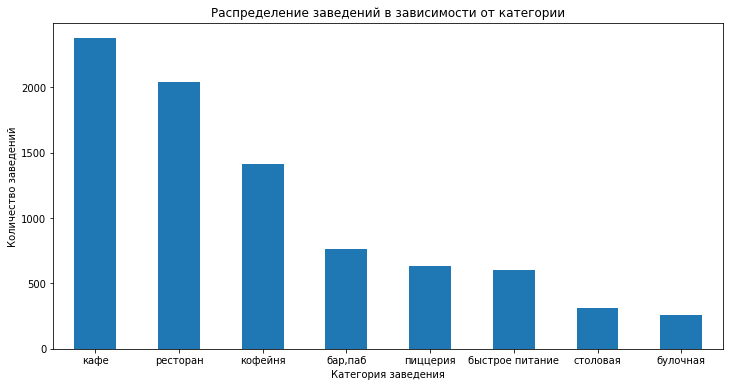

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
rest_df['category'].value_counts().plot(
               kind='bar',
               rot=0, 
               legend=False, 
               title=f'Распределение заведений в зависимости от категории'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')


# Выводим график
plt.show()

Из графика видно значительное преобладание заведений с категориями `кафе`,`ресторан` и `кофейня`.

Выведем количество заведений Москвы в зависимости от административного района г. Москвы.

In [43]:
# Посчитаем количество заведений каждой категории с помощью метода 'value_counts'
print('Количество административных районов:')
print(rest_df['district'].nunique())
print('Распределение данных по административным районам:')
print(rest_df['district'].value_counts())
print('Распределение данных по административном районам в %:')
print(rest_df['district'].value_counts()/len(rest_df)*100)

Количество административных районов:
9
Распределение данных по административным районам:
Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64
Распределение данных по административном районам в %:
Центральный административный округ         26.684123
Северный административный округ            10.687931
Южный административный округ               10.616520
Северо-Восточный административный округ    10.592716
Западный административный округ            10.116639
Восточный административный округ            9.497739
Юго-Восточный административный округ        8.497977
Юго-Западный администрати

Всего в датафрейме содержится 9 административных районов. Значительное количество заведений располагается в Центральном административном округе - 2242 заведений или 26,68%. Меньше всего заведений территориально находятся в  Северо-Западный административном округе - 409 заведений или 4,87%. По остальным районам заведения распределены равномерно - около 8-10% для каждого района.

Построим визуализацию распределения заведений по административным районам.

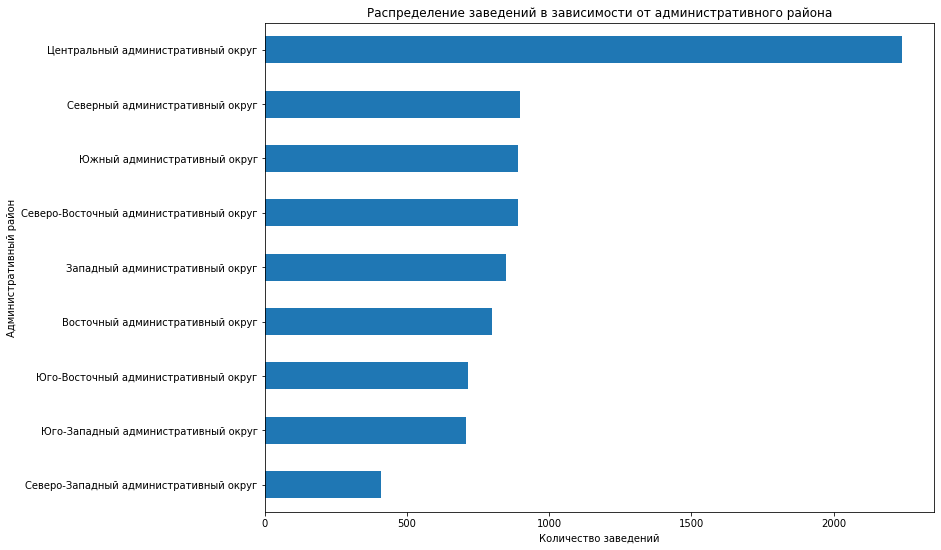

In [44]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
rest_df['district'].value_counts(ascending=True).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Распределение заведений в зависимости от административного района'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Административный район')


# Выводим график
plt.show()

На диаграмме наглядно видно значительное преобладание Центрального административного округа по количеству заведений над остальными.

Далее отдельно рассмотрим распределение заведений каждой категории в Центральном административном округе Москвы.

In [45]:
print("Количетсво заведений Центрального административного округа в разрезе категории:")
print(rest_df.loc[rest_df['district'] == "Центральный административный округ"]['category'].value_counts())
print("Количество заведений Центрального административного округа в разрезе категории в %:")
print(rest_df.loc[rest_df['district'] == "Центральный административный округ"]['category'].value_counts()/
len(rest_df.loc[rest_df['district'] == "Центральный административный округ"])*100)

Количетсво заведений Центрального административного округа в разрезе категории:
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64
Количество заведений Центрального административного округа в разрезе категории в %:
ресторан           29.884032
кафе               20.695807
кофейня            19.090098
бар,паб            16.235504
пиццерия            5.040143
быстрое питание     3.880464
столовая            2.943800
булочная            2.230152
Name: category, dtype: float64


Распределение заведений Центрального административного округа в разрезе категорий имеет некоторые отличия по сравнению с распределением по категориям всех заведений г. Москвы. Наибольший процент вместо кафе составляют рестораны - 29,88%, кафе составляют 20,7%. При этом наблюдается более высокий процент кофеен - 19,01% и баров - 16,24%. При этом наименьший процент также среди столовых - 2,94% и булочных - 2,23%.

Построим визуализацию распределения заведений по категориям для Центрального административного округа.

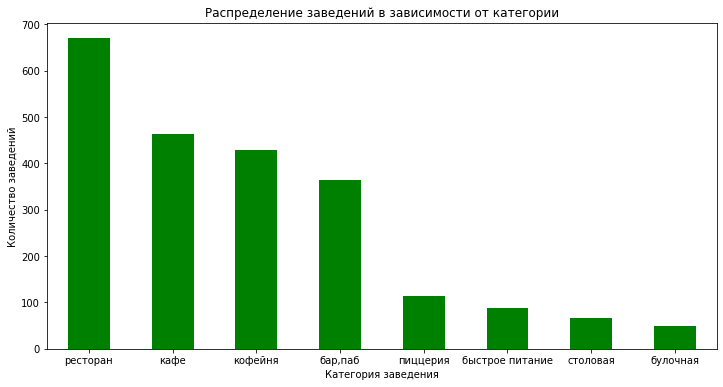

In [46]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 6))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
rest_df.loc[rest_df['district'] == "Центральный административный округ"]['category'].value_counts().plot(
               kind='bar', 
               rot=0, 
               legend=False, 
               title=f'Распределение заведений в зависимости от категории',
    color='green'
)

# Настраиваем оформление графика
plt.xlabel('Категория заведения')
plt.ylabel('Количество заведений')


# Выводим график
plt.show()

На диаграмме наглядно видно значительное преобладание заведений категории "ресторан", а также большее количество кафе, кофеен и баров (пабов).

Выведем общее количество сетевых и несетевых заведений в абсолютном и относительном значениях.

In [47]:
print("Общее количество сетевых и несетевых заведений:")
print(rest_df.groupby('chain')['chain'].count())
print("Общее количество сетевых и несетевых заведений в %:")
print(rest_df.groupby('chain')['chain'].count()/len(rest_df)*100)

Общее количество сетевых и несетевых заведений:
chain
0    5199
1    3203
Name: chain, dtype: int64
Общее количество сетевых и несетевых заведений в %:
chain
0    61.878124
1    38.121876
Name: chain, dtype: float64


Всего датафрейм содержит данные о 3203 сетевых и 5199 несетевых заведений, что составляет 38,12% и 61,88% соответственно. Отобразим полученные данные на круговой диаграмме.

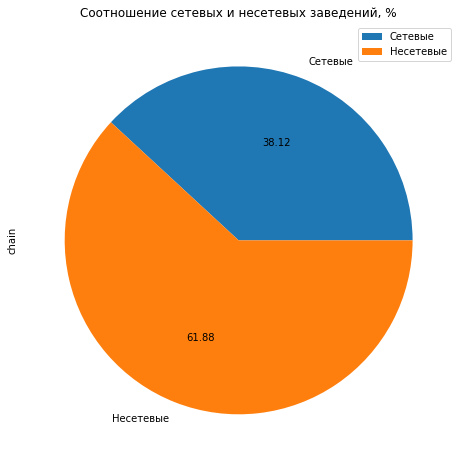

In [48]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 8))

# Строим круговую диаграмму с помощью pandas через plot(kind='pie')
rest_df['chain'].value_counts(ascending=True).plot(
               kind='pie', 
               title=f'Соотношение сетевых и несетевых заведений, %',
               autopct='%.2f',
               labels=['Сетевые', 'Несетевые'],
                           
)

# Настраиваем оформление графика
plt.legend()


# Выводим график
plt.show()

Также рассмотрим соотношение сетевых и несетевых заведений в разрезе категорий.

In [49]:
print('Соотношение сетевых и несетевых заведений по категориям в абсолютных значениях:')
print(rest_df.groupby('category')['chain'].value_counts().unstack(fill_value=0))
print('Соотношение сетевых и несетевых заведений по категориям в относительных значениях, в %:')
print(rest_df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)*100)

Соотношение сетевых и несетевых заведений по категориям в абсолютных значениях:
chain               0    1
category                  
бар,паб           596  168
булочная           99  157
быстрое питание   371  232
кафе             1597  779
кофейня           693  720
пиццерия          303  330
ресторан         1313  729
столовая          227   88
Соотношение сетевых и несетевых заведений по категориям в относительных значениях, в %:
chain                    0          1
category                             
бар,паб          78.010471  21.989529
булочная         38.671875  61.328125
быстрое питание  61.525705  38.474295
кафе             67.213805  32.786195
кофейня          49.044586  50.955414
пиццерия         47.867299  52.132701
ресторан         64.299706  35.700294
столовая         72.063492  27.936508


Как видно из выгрузки соотношение сетевых и несетевых заведений по категориям распределено не равномерно. Самый большой процент сетевых заведений наблюдается среди булочных - 61,33%. Кофейни и пиццерии распределены поровну с небольшим преобладанием сетевых заведений. Для остальных категорий большую часть занимают несетевые заведения, самый большой процент наблюдается у баров и столовых - 78,01% и 72,06% соответственно.

Построим визуализацию соотношения сетевых и несетевых заведений в разрезе категории.

In [50]:
#rest_chain=rest_df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)*100
#print(rest_chain[1])

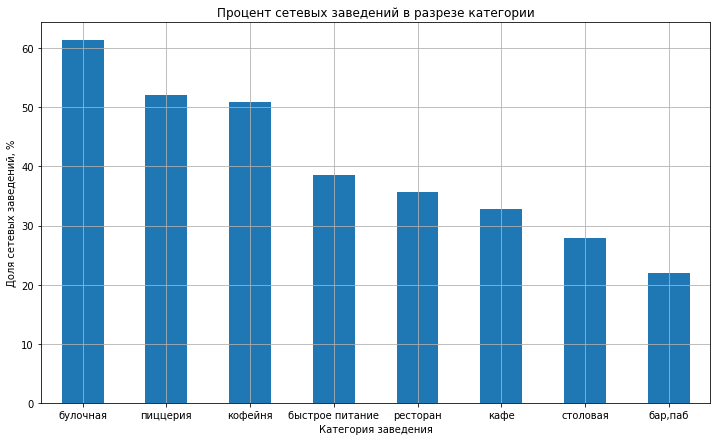

In [51]:
# Построим график столбчатой диаграммы

rest_chain=rest_df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)*100

rest_chain[1].sort_values(ascending=False).plot(kind='bar',
               title=f'Процент сетевых заведений в разрезе категории',
               ylabel='Доля сетевых заведений, %',
               xlabel='Категория заведения',
               rot=0,
               figsize=(12, 7))
plt.grid()

# Выводим график
plt.show()

На диаграмме наглядно видно преобладание сетевых заведений над несетевыми для категорий `булочная`, `кофейня` и `пиццерия`.

Выведем статистические показатели для столбца `seats`.

In [52]:
# Изучаем статистические показатели столбца "seats"
print('Статистические показатели столбца seats:')
rest_df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361435
std       122.841133
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Минимальное количество посадочных мест — 0, максимальное — 1288. Среднее значение составляет 108,36 мест, тогда как медиана — 75. Значительное отклонение среднего значения от медианы свидетельствует о том, что распределение не является нормальным, превышение среднего значения над медианой свидетельствует о правом симметричном распределении. Также наблюдается высокое значение стандартного отклонения, а также крайне высокое максимальное значение, что может свидетельствовать о наличии выбросов в данных.

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха для столбца с посадочными местами.

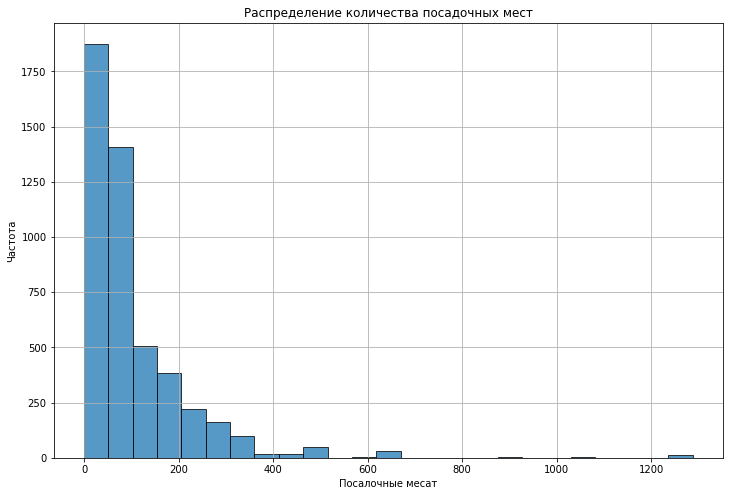

In [53]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
rest_df['seats'].plot(
                kind='hist', 
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)

# Настраиваем оформление графика
plt.title('Распределение количества посадочных мест')
plt.xlabel('Посалочные месат')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

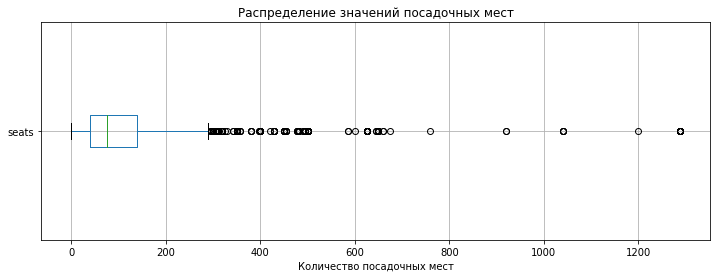

In [54]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 4))

# Строим диаграмму размаха значений в столбце seats
rest_df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

Распределение значения посадочных мест асимметричное, скошенное вправо. По гистограмме распределения значений видно, что большинство значений сосредоточенно в интервале от 0 до 100 посадочных мест. По гистограмме размаха видно, что значения выше примерно 350 мест можно считать выбросами. Данные выбросы могли возникнуть из-за ошибок ввода или аномальных данных.

Для каждой категории заведений приведём наиболее типичное для него количество посадочных мест. Для этого для каждой категории рассчитаем медиану. В связи с наличием выбросов использование для данной задачи среднего значения может выдать некорректный результат.

In [55]:
# Выведем медианное значение для посадочных мест в зависимости от категории заведения
rest_df.groupby('category')['seats'].median().sort_values(ascending=False)

category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0
Name: seats, dtype: float32

Медианные значения посадочных мест для каждой категории колеблются в интервале 50-86 мест. Больше всего посадочных мест характерно для ресторанов и баров - 86 и 82 мест соответственно, меньше всего для булочных и пиццерий - 50 и 55 мест соответственно. 


Выведем визуализацию для отражения медианных значения посадочных мест для каждой категории.

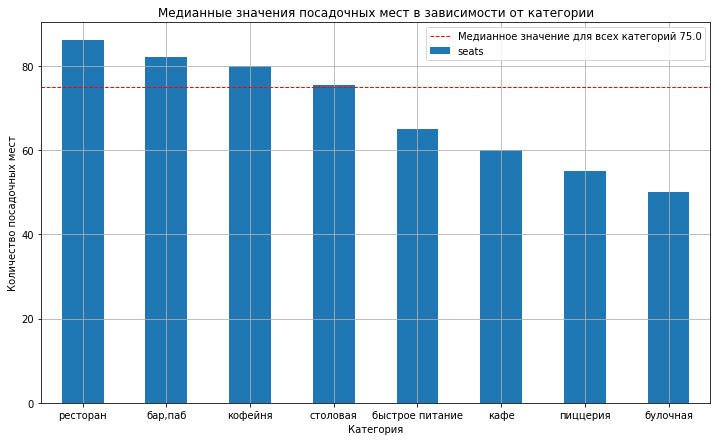

In [56]:
# Строим диаграмму медианных значений в столбце seats в разрезе категорий
rest_df.groupby('category')['seats'].median().sort_values(ascending=False).plot(kind='bar',
               title=f'Медианные значения посадочных мест в зависимости от категории',
               legend=True,
               ylabel='Количество посадочных мест',
               xlabel='Категория',
               rot=0,
               figsize=(12, 7))

# Рассчитываем медианное значение посадочных мест вне зависимости от категории
median_seats = rest_df['seats'].median()

# Наносим на график линию с медианным значением посадочных мест независимо от категории
plt.axhline(median_seats, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Медианное значение для всех категорий {round(median_seats,4)}')

plt.grid()
plt.legend()

Из диаграммы видно, что количество посадочных мест для заведений таких категорий как `бар`, `кофейня`, `ресторан`, `столовая` выше медианного значения мест вне зависимости от категории.

Выведем статистические показатели для столбца rating.

In [57]:
# Изучаем статистические показатели столбца "rating"
print('Статистические показатели столбца rating:')
rest_df['rating'].describe()

Статистические показатели столбца rating:


count    8402.000000
mean        4.230016
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

Минимальное значение рейтинга составляет 0,47, максимальное - 5. Среднее значение 4,23 достаточно близко к медианному значению - 4,3, что свидетельствует о том, что распределение близко к нормальному.

Построим гистограмму распределения значений для столбца с рейтингом.

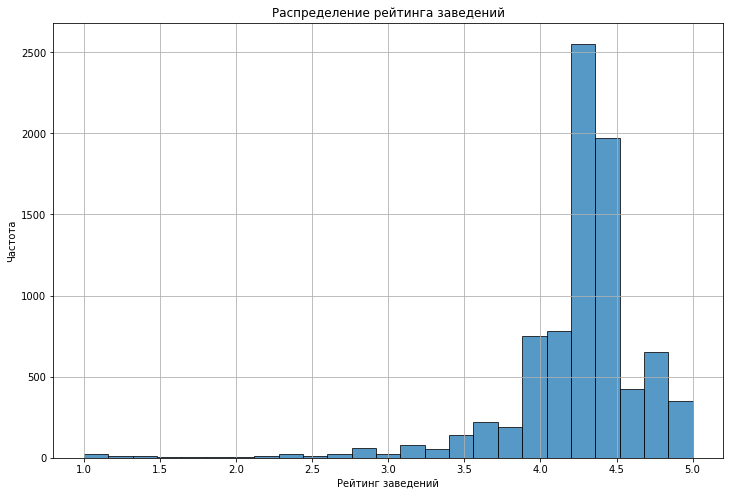

In [58]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 8))

# Строим гистограмму с помощью pandas через plot(kind='hist')
rest_df['rating'].plot(
                kind='hist', 
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0, 
)

# Настраиваем оформление графика
plt.title('Распределение рейтинга заведений')
plt.xlabel('Рейтинг заведений')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

На гистограмме наблюдается левосторонняя или отрицательная скошенность, среднее значение меньше медианы. Наиболее часто встречаемым значением (мода) является 4,3. Для большинства заведений рейтинг находится в интервале 4.2-4.5. Заведения с крайне низким рейтингом (1.0-3.0) встречаются нечасто.

Далее выведем средние значения рейтингов заведения в зависимости от категории.

In [59]:
# Выведем средние значения рейтингов заведения в зависимости от категории
rest_df.groupby('category')['rating'].mean().sort_values()

category
быстрое питание    4.050249
кафе               4.124285
столовая           4.211429
булочная           4.268359
кофейня            4.277282
ресторан           4.290401
пиццерия           4.301264
бар,паб            4.387696
Name: rating, dtype: float32

Наибольшим средним рейтингом обладают заведения категорий `бар, паб` и `пиццерия`, наименьшим - заведения категорий `быстрое питание` и `кафе`.

Дополнительно выведем визуализацию средних значений в зависимости от категории.

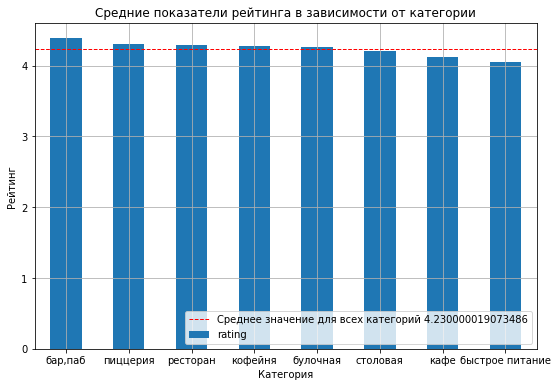

In [60]:
# Строим диаграмму с помощью pandas через plot(kind='bar')
rest_df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
               title=f'Средние показатели рейтинга в зависимости от категории',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Категория',
               rot=0,
               figsize=(9, 6))

# Рассчитываем медианное значение посадочных мест вне зависимости от категории
mean_rating = rest_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга независимо от категории
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии
            label=f'Среднее значение для всех категорий {round(mean_rating,4)}')

plt.grid()
plt.legend(loc='lower right')

Как видно из диаграммы, для большинства категорий средний рейтинг заведений близок к среднему значению по всей выборке. Однако для таких категорий как `быстрое питание`, `кафе` и `столовая` данный показатель чуть ниже среднего рейтинга по всем заведениям.

Рассчитаем матрицу корреляции `phi_k` для данных о рейтинг заведений общественного питания г. Москвы. В качестве факторов, влияющих на рейтинг будут рассмотрены  категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

Выведем корреляционную матрицу.

In [61]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = rest_df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.310473
category,0.198739
district,0.189453
is_24_7,0.161010
chain,0.118857
seats,0.000000


Наибольшая корреляция рейтинга заведений наблюдается с уровнем цен (0.31). Также наблюдается определённая корреляция с категорией заведения (0.2) и административным районом (0.19). Совсем отсутствует корреляция между рейтингом и количеством посадочных мест.

Визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn.

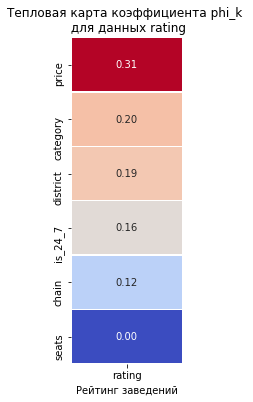

In [62]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False 
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведений')

# Выводим график
plt.show()

Изучим, существует ли зависимость между рейтингом заведения и уровнем цен. Для этого построим столбчатую диаграмму среднего рейтинга заведений с разделением по признаку `price`. Перед этим предварительно исключим пустые значения по столбцу price.

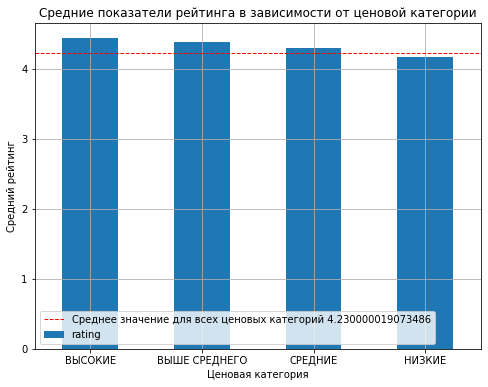

In [63]:
# Строим диаграмму с помощью pandas через plot(kind='bar')
price_w_out_blank=rest_df.loc[rest_df['price'] != '']
price_w_out_blank.groupby('price')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
               title=f'Средние показатели рейтинга в зависимости от ценовой категории',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Ценовая категория',
               rot=0,                                                                         
               figsize=(8, 6))

# Рассчитываем среднее значение рейтинга вне зависимости от ценовой категории
mean_rating = rest_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга независимо от категории
plt.axhline(mean_rating, # Данные, по которым строится линия
            color='red', # Цвет линии
            linestyle='--', # Стиль линии
            linewidth=1, # Ширина линии,
            label=f'Среднее значение для всех ценовых категорий {round(mean_rating,4)}')

plt.grid()
plt.legend()

Как видно из диаграммы, между уровнем цен и рейтингом заведения существует определённая зависимость. Заведения с более высокими ценами имеют более высокий рейтинг, заведения с низкими ценами - более низкий. При этом заведедения с ценовыми категориями `Высокие`, `Выше среднего` и `Средние` имеют рейтинг выше чем средний рейтинга по всей выборке.

Выведем топ-15 популярных сетей в г. Москва по количеству заведений с указанием среднего рейтинга и категории для сети.

In [64]:
top_rest=rest_df.groupby('name').agg({'id':'count','rating': 'mean', 'category': pd.Series.mode}).sort_values('id',ascending=False).head(15)
print('Топ-15 популярных сетей в г. Москва по количеству заведений:')
print(top_rest)
print('Значения среднего рейтинга для всех заведений г. Москва:')
print(rest_df['rating'].mean())

Топ-15 популярных сетей в г. Москва по количеству заведений:
                                      id    rating         category
name                                                               
КАФЕ                                 188  3.884574             кафе
ШОКОЛАДНИЦА                          120  4.177500          кофейня
ДОМИНО'С ПИЦЦА                        77  4.171429         пиццерия
ДОДО ПИЦЦА                            74  4.286487         пиццерия
ONE PRICE COFFEE                      72  4.069445          кофейня
ЯНДЕКС ЛАВКА                          69  3.872464         ресторан
COFIX                                 65  4.075385          кофейня
PRIME                                 50  4.116000         ресторан
ХИНКАЛЬНАЯ                            44  4.322727             кафе
ШАУРМА                                43  3.909302  быстрое питание
КОФЕПОРТ                              42  4.147619          кофейня
КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ   39  4.394872     

Наибольшее количество заведений наблюдается для таких сетей как `Кафе`- 188 заведений, `ШОКОЛАДНИЦА` - 120 заведений и `ДОМИНО'С ПИЦЦА` - 77 заведений. Можно отметить, что средний рейтинг для большинства заведений из топ 15 ниже среднего рейтинга по всей выборке.

Из сетей топ-15 по количеству заведений, большинство сетей относится к категории `кафе`, `кофейня` и `ресторан` по 4 сети.

In [65]:
# Выведем распределение по категориям для заведений из топ-15
top_rest.groupby('category')['category'].count()

category
быстрое питание    1
кафе               4
кофейня            4
пиццерия           2
ресторан           4
Name: category, dtype: int64

Дополнительно выведем визуализацию для топ-15 сетей по количеству заведений.

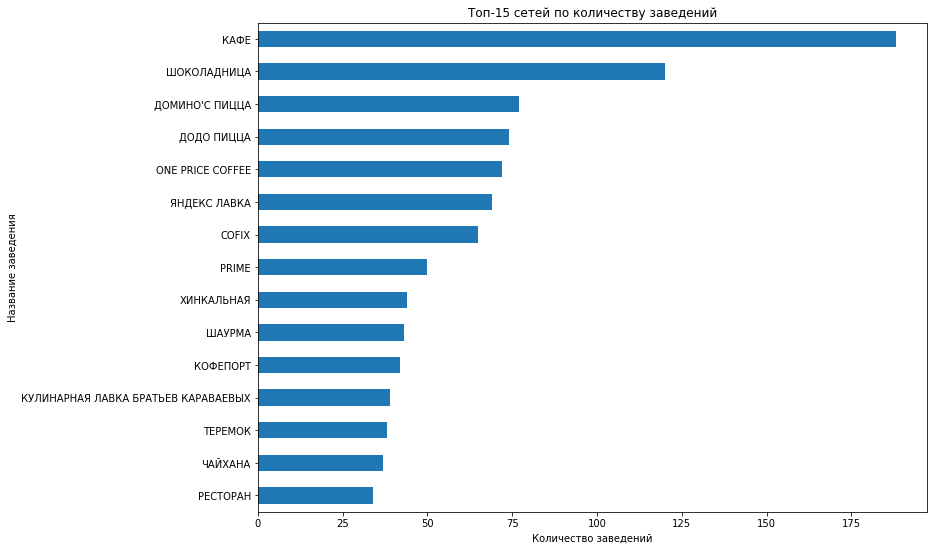

In [66]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))


# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
rest_df['name'].value_counts(ascending=True).tail(15).plot(
               kind='barh', 
               rot=0, 
               legend=False, 
               title=f'Топ-15 сетей по количеству заведений'
)

# Настраиваем оформление графика
plt.xlabel('Количество заведений')
plt.ylabel('Название заведения')


# Выводим график
plt.show()

Дополнительно выведем визуализацию среднего рейтинга топ-15 сетей по количеству заведений.

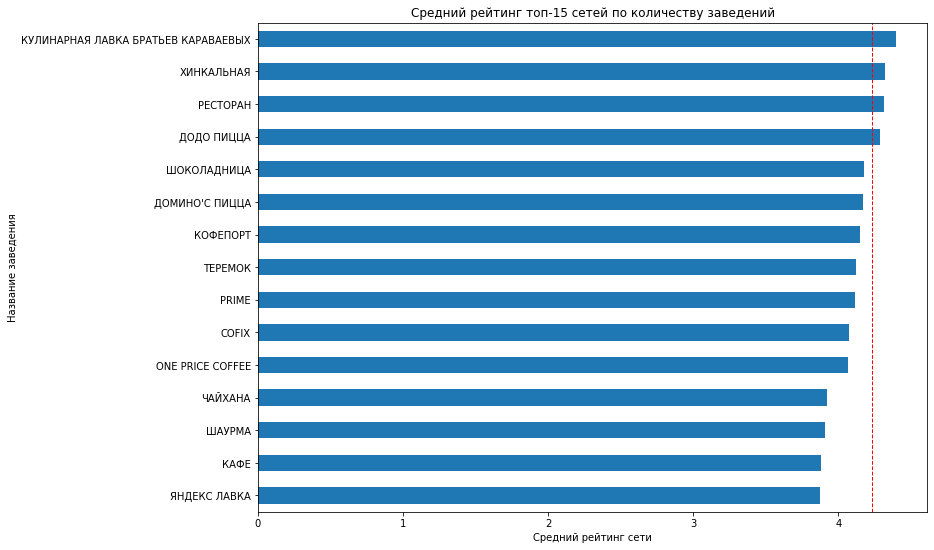

In [67]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(12, 9))


# Строим столбчатую диаграмму с помощью pandas через plot(kind='barh')
top_rest['rating'].sort_values(ascending=True).plot(
               kind='barh', 
               rot=0, 
               legend=False,
               title=f'Средний рейтинг топ-15 сетей по количеству заведений'
)

# Настраиваем оформление графика
plt.xlabel('Средний рейтинг сети')
plt.ylabel('Название заведения')

# Рассчитываем среднее значение рейтинга вне зависимости от ценовой категории
mean_rating = rest_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга независимо от категории
plt.axvline(mean_rating, 
            color='red', 
            linestyle='--', 
            linewidth=1, 
            label=f'Среднее значение для всех ценовых категорий {round(mean_rating,4)}')

# Выводим график
plt.show()

Как видно из визуализации наибольшим средним рейтингом среди самых популярных сетей обладают такие сети как `КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ`, `ХИНКАЛЬНАЯ`, `РЕСТОРАН` и `ДОДДО ПИЦЦА`. Для данных сетей значение среднего рейтинга превосходит значение среднего рейтинга по всей выбороке данных.

Выведем статистические показатели с помощью метода `describe()` для столбца `middle_avg_bill` в разрезе административного района г. Москвы.

In [68]:
# Выведем статистические показатели для столбца 'middle_avg_bill' в разрезе района
group_rest=rest_df.groupby('district')['middle_avg_bill'].describe().sort_values('mean', ascending=False)
print(group_rest)

                                          count         mean          std  \
district                                                                    
Центральный административный округ       1060.0  1191.057495   920.014709   
Западный административный округ           306.0  1053.225464   779.008484   
Северный административный округ           322.0   927.959656   912.609192   
Южный административный округ              314.0   834.398071  2008.640625   
Северо-Западный административный округ    157.0   822.222900   595.055237   
Восточный административный округ          260.0   820.626953   850.903320   
Юго-Западный административный округ       235.0   792.561707   559.173096   
Северо-Восточный административный округ   301.0   716.611267   591.232117   
Юго-Восточный административный округ      194.0   654.097961   566.825684   

                                           min     25%     50%     75%  \
district                                                                 
Цент

Как видно из выгрузки наибольший размер среднего чека зафиксирован в Центральном административном округе. Также одни из наибольших значений зафиксированы в Западном и Северном округах, наименьшие - Северо-восточном и Юго-восточном округах. Наибольшие медианные значения зафиксированы в Центральном и Западном округах. Наибольшее стандартное отклонение зафиксировано Южного административного округа, что может свидетельствовать о наибольшем разбросе цен в данном округе.


Выведем визуализацию вариацию среднего чека заведения (столбец middle_avg_bill), а также медианного значения чека в зависимости от района. Дополнительно нанесём на диаграмму вертикальные линии, отражающуе значения среднего и медианного значения чека по всей выборке.

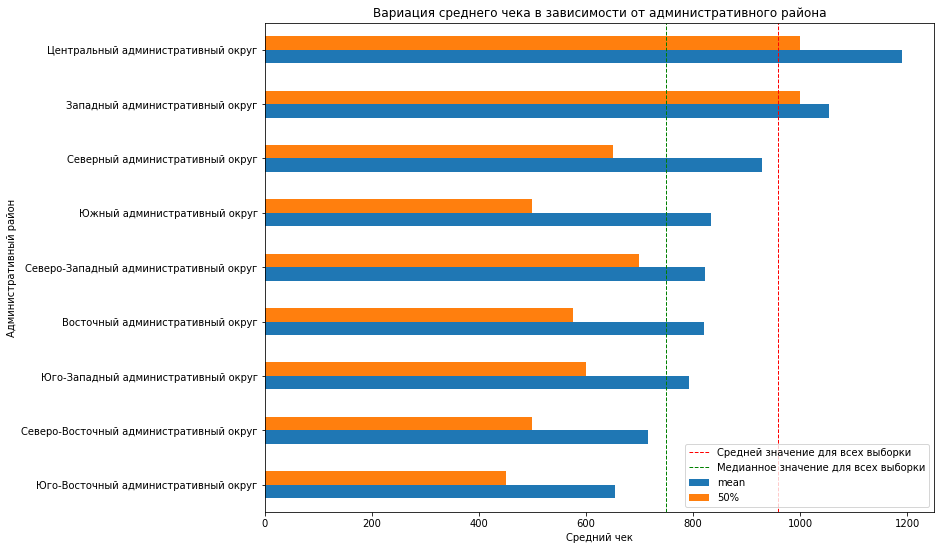

In [69]:
# Строим горизонтальную столбчатую диаграмму с помощью pandas через plot(kind='barh')

group_rest.sort_values('mean').plot(
               kind='barh', 
               rot=0, 
               y=['mean','50%'], 
               figsize=(12, 9), 
               legend=True,
               title=f'Вариация среднего чека в зависимости от административного района'
)

# Настраиваем оформление графика
plt.xlabel('Средний чек')
plt.ylabel('Административный район')


# Рассчитываем значение среднего чека и медианы чека по всей выборке данных
mean_bill= rest_df['middle_avg_bill'].mean()
median_bill= rest_df['middle_avg_bill'].median()

# Наносим на график линию со значением среднего чека независимо от района
plt.axvline(mean_bill, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Средней значение для всех выборки'
            )
# Наносим на график линию с медианой среднего чека независимо от района
plt.axvline(median_bill, 
            color='green', 
            linestyle='--', 
            linewidth=1,
            label=f'Медианное значение для всех выборки'
            )
plt.legend()

---


Из графика видно, что значения среднего чека в Центральном и Западном административном округах выше значения среднего чека по всей выборке данных. То же самое касается и медианных значений среднего чека. Для Западного и Северо-западного округов медианные значения находятся достаточно близко к средним, что говорит о незначительной вариации цен внутри округа. В то время как для Северного и Южного административного округов разрыв между медианой и средним значением существенен, что свидетельствует о значительном разброс цен в данных районах.

### Промежуточный вывод

Исследовательский анализ данных показал, что:

 - Заведения общественного питания г. Москвы представлены 8 различными категориями, в т.ч. такими категориями как `ресторан`, `кофейня`, `кафе`, `бар(паб)`, `пиццерия`, `быстрое питание`, `столовая`, `булочная`. Наиболее часто встречаемые категории заведений - `кафе` - 28,28% от всех заведений г. Москвы, `ресторан` - 24,3% и `кофейня` - 16,81%, наименее - `столовая` - 3,75% и `булочная` - 3,04%.
 - Заведения общественного питания г. Москвы представлены 9 административными районами. Значительное количество заведений располагается в Центральном административном округе - 2242 заведений или 26,68%. Меньше всего заведений территориально находятся в Северо-Западный административном округе - 409 заведений или 4,87%. В центральном администраивном округе наибольший процент составляют `рестораны` - 29,88%, `кафе` составляют 20,7%. Также наблюдается более высокий процент `кофеен` - 19,01% и `баров` - 16,24%. Наименьший процент среди `столовых` - 2,94% и `булочны`х - 2,23%.
 - Всего датафрейм содержит данные о 3203 сетевых и 5199 несетевых заведений, что составляет 38,12% и 61,88% соответственно. Самый большой процент сетевых заведений наблюдается среди `булочных` - 61,33%. `Кофейни` и `пиццерии` распределены поровну с небольшим преобладанием сетевых заведений. Для остальных категорий большую часть занимают несетевые заведения.
 - Среднее количество посадочных мест составляет 108,36 мест, медианное — 75. Количество мест выше  350 мест можно считать выбросами, которые могли возникнуть из-за ошибок ввода или аномальных данных. Медианные значения посадочных мест для каждой категории колеблются в интервале 50-86 мест. Больше всего посадочных мест характерно для `ресторанов` и `баров` - 86 и 82 мест соответственно, меньше всего для `булочных` и `пиццерий` - 50 и 55 мест соответственно.
 - Минимальное значение рейтинга для заведений г. Москва составляет 0,47, максимальное - 5. Среднее значение - 4,23 медианное - 4,3. Для большинства заведений рейтинг находится в интервале 4.2-4.5. Наибольшим средним рейтингом обладают заведения категорий `бар, паб` и `пиццерия`, наименьшим - заведения категорий `быстрое питание` и `кафе`.
 - Наибольшая корреляция рейтинга заведений наблюдается с уровнем цен (0.31). Также наблюдается определённая корреляция с категорией заведения (0.2) и административным районом (0.19). Совсем отсутствует корреляция между рейтингом и количеством посадочных мест. Исследование зависимости между уровнем цен и рейтингом заведения показало, что заведения с более высоким ценами имеют более высокий рейтинг, заведения с низкими ценами - более низкий.
 - Наибольшее количество заведений наблюдается для таких сетей как `КАФЕ`- 188 заведений, `ШОКОЛАДНИЦА` - 120 заведений и `ДОМИНО'С ПИЦЦА` - 77 заведений. Средний рейтинг для большинства заведений из топ-15 ниже среднего рейтинга по всей выборке. Из сетей топ-15 по количеству заведений, большинство сетей относится к категориям `кафе`, `кофейня` и `ресторан`. Наибольшим средним рейтингом среди самых популярных сетей обладают такие сети как `КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ`, `ХИНКАЛЬНАЯ`, `РЕСТОРАН` и `ДОДДО ПИЦЦА`
 - Наибольший размер среднего чека зафиксирован в Центральном административном округе. Также одни из наибольших значений зафиксированы в Западном и Северном округах, наименьшие - Северо-восточном и Юго-восточном округах. Наибольшие медианные значения зафиксированы в Центральном и Западном округах. 

## 4. Итоговый вывод и рекомендации

### 1. Общий обзор проделанной работы.

Таким образом, в ходе данного исследования был проведён анализ заведений общественного питания г. Москвы, на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. В качестве источников данных были использованы два датасета: `datasets/rest_info.csv` и `datasets/rest_price.csv`, содержащие информацию о около 8000 заведений г. Москва. Данные включали информацию о категории и расположении заведений, графике работы, ценах, часах работы. В ходе исследования были проанализировано количество заведений в зависимости от категории и их распределение по административным районам г. Москва. Отдельно дополнительно был рассмотрен  Центральный административный округ. Также было изучено соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения, количество посадочных мест в заведениях. Кроме этого были проанализированы рейтинги заведений, изучена взаимосвязь рейтинга с другими параметрами. Были определены топ-15 популярных сетей по количество заведений и рассмотрена вариация среднего чека заведения в зависимости от района Москвы.

### 2. Ответы на исследовательские вопросы, или главные выводы.

В ходе исследовательского анализа было выявлено, что наиболее часто встречаемыми категориями заведений являются кафе - 28,28% от всех заведений г. Москвы, ресторан - 24,3% и кофейня - 16,81%, наименее - столовая - 3,75% и булочная - 3,04%. 

Всего заведения общественного питания г. Москвы представлены 9 административными районами. Значительное количество заведений располагается в Центральном административном округе - 26,68% от общего количества заведений. Меньше всего заведений территориально находятся в Северо-Западный административном округе - 409 заведений или 4,87%. По остальным районам заведения распределены равномерно - около 8-10% для каждого округа.

Из всех заведений г. Москва 38,12% составляют сетевые, 61,88%  - несетевые. Самый большой процент сетевых заведений наблюдается среди булочных - 61,33%. Кофейни и пиццерии распределены поровну с небольшим преобладанием сетевых заведений. Для остальных категорий большую часть занимают несетевые заведения.

Среднее количество посадочных мест составляет 108,36 мест, медианное — 75. Больше всего посадочных мест характерно для ресторанов и баров - 86 и 82 мест соответственно, меньше всего для булочных и пиццерий - 50 и 55 мест соответственно.

Среднее значение рейтинга заведений г. Москвы составляет 4,23 медианное - 4,3. Для большинства заведений рейтинг находится в интервале 4.2-4.5. Наибольшим средним рейтингом обладают заведения категорий `бар(паб)` и `пиццерия`, наименьшим - заведения категорий `быстрое питание` и `кафе`.

Наибольшая корреляция рейтинга заведений наблюдается с уровнем цен. Исследование зависимости между уровнем цен и рейтингом заведения показало, что заведения с более высокими ценами имеют более высокий рейтинг, заведения с низкими ценами - более низкий.

Наибольшее количество заведений наблюдается для таких сетей как `КАФЕ`- 188 заведений,` ШОКОЛАДНИЦА` - 120 заведений и `ДОМИНО'С ПИЦЦА` - 77 заведений. Из сетей топ-15 по количеству заведений, большинство сетей относится к категориям `кафе`, `кофейня` и `ресторан`. Наибольшим средним рейтингом среди самых популярных сетей обладают такие сети как `КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ`, `ХИНКАЛЬНАЯ`, `РЕСТОРАН` и `ДОДДО ПИЦЦА`

Наибольший размер среднего чека зафиксирован в Центральном административном округе. Также одно из наибольших значений зафиксировано в Западном  административном округе. Для остальных районов размер среднего чека ниже, чем по всей выборке.

### 3. Рекомендации на основе анализа данных.

Исследование показало, что значительное количество заведений сосредоточено в Центральном административном округе, в связи с чем открытие нового заведения в данном районе может оказаться нецелесообразным ввиду уже имеющего высокого уровня предложения. Вместе с тем стоит обратить внимание на Западный административный округ. В данном районе количество заведений не превышает большинство других районов, при этом размер среднего чека уступает только Центральному административному округу. Оптимальным уровнем цен может оказаться уровень `выше среднего`, т.к. это может создать преимущество перед заведениями с более высоким размером среднего чека. Также заведения с данным уровнем цен обладают относительно высоким рейтингом, однако при формировании ценовой политики необходимо будет учесть в том числе планируемую категорию заведений. При выборе категории стоит учесть высокий уровень предложения на рынке таких категорий как `кафе`, `ресторан` и `кофейня`. В связи с чем имеет смысл обратить внимание на такие категории как `бар,паб` и `пиццерия`.